In [ ]:
!pip install colour
!pip install seaborn

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [114]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
columns = ["perf", "numjobs", "bsKB"]
df = pd.read_csv("fio_test - daos-test.csv.csv")
print("Contents in csv file:", df.columns)
print(df['bs (KiB)'])

Contents in csv file: Index(['Type', 'bs', 'bs (Byte)', 'bs (KiB)', 'numjobs', 'perf (MB/s)',
       'Total writes (GiB)'],
      dtype='object')
0      8.742188
1      8.742188
2      8.742188
3      8.742188
4      8.742188
        ...    
65    16.000000
66    16.000000
67    16.000000
68    16.000000
69    16.000000
Name: bs (KiB), Length: 70, dtype: float64


I tried a couple of options for colors. The first pallete uses the color library to pick colors between a range, you could trying updating the upper and lower range for better results(teal_pallete1). I also manually set a teal color pallete but it might be a bit confusing (teal_pallete2).

In [115]:
from colour import Color
teal = Color("#2a5674")
light_blue = Color("#b2d8d8")
colors = list(light_blue.range_to(Color(teal),7))
teal_pallete1 = []
for x in colors:
    teal_pallete1.append(x.rgb)

teal_pallete2 = ["#d1eeea","#a8dbd9","#85c4c9","#68abb8","#4f90a6","#3b738f","#2a5674"]

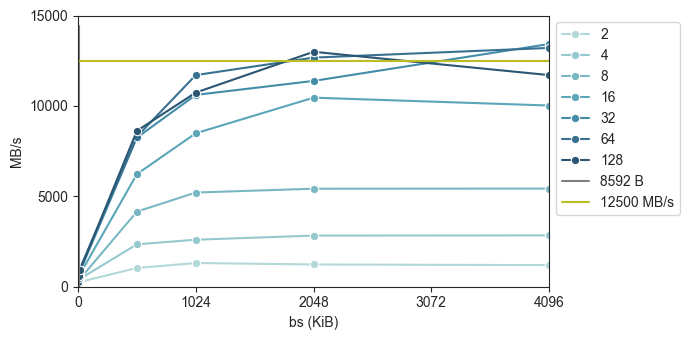

In [116]:
plt.ylim(bottom=0)
plt.xlim(left=0)
ax = sns.lineplot(x='bs (KiB)', y='perf (MB/s)', hue='numjobs', data=df, palette=teal_pallete1, markers=True, marker='o')
ax.tick_params(bottom=True, left=True)
ax.set(xlabel='bs (KiB)', ylabel='MB/s')
ax.plot([8.952,8.952], [-100, max(df['perf (MB/s)']) + 1000], label='8592 B')
ax.plot([0,max(df['bs (KiB)']) + 100], [12500,12500], label = '12500 MB/s')
ax.set_xticks([0,1024,2048,3072,4096])
ax.set_yticks([0, 5000, 10000, 15000])
ax.legend()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))